# State Level Data

In [8]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

inequality = pd.read_csv("WID_data_US-MI.csv",sep=";")
inequality = inequality[inequality["variable"]=="sptinc992t"]
inequality = inequality[inequality["percentile"] == "p95p100"]

crime = pd.read_csv("estimated_crimes_1979_2018_rev1.csv")
crime = crime[crime["state_abbr"] == "MI"]

df= crime.merge(inequality, how= "left", on="year", left_index=True)
df.columns

Index(['year', 'state_abbr', 'population', 'violent_crime', 'homicide',
       'rape_legacy', 'rape_revised', 'robbery', 'aggravated_assault',
       'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft',
       'caveats', 'country', 'variable', 'percentile', 'value', 'age', 'pop'],
      dtype='object')

<IPython.core.display.Javascript object>


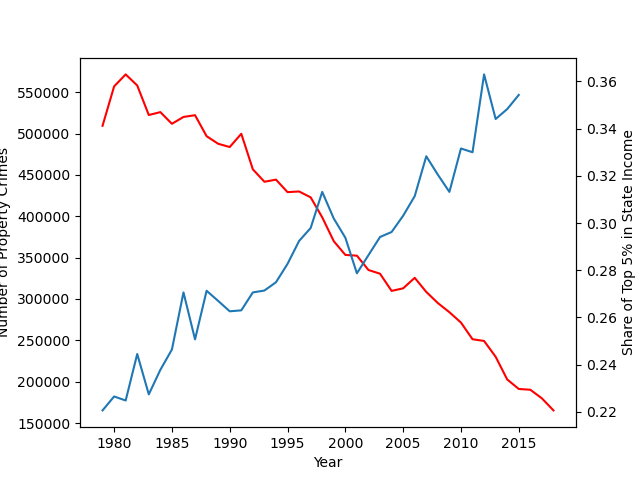

Text(0, 0.5, 'Number of Property Crimes')

In [23]:
fig, ax1 = plt.subplots()
#ax1.scatter(df["violent_crime"],df["value"])
ax2 = ax1.twinx()
ax1.plot(df["year"],df["property_crime"],"-", color = "red")
ax2.plot(df["year"],df["value"],"-")
ax1.set_xlabel("Year")
ax2.set_ylabel("Share of Top 5% in State Income")
ax1.set_ylabel("Number of Property Crimes")

<IPython.core.display.Javascript object>


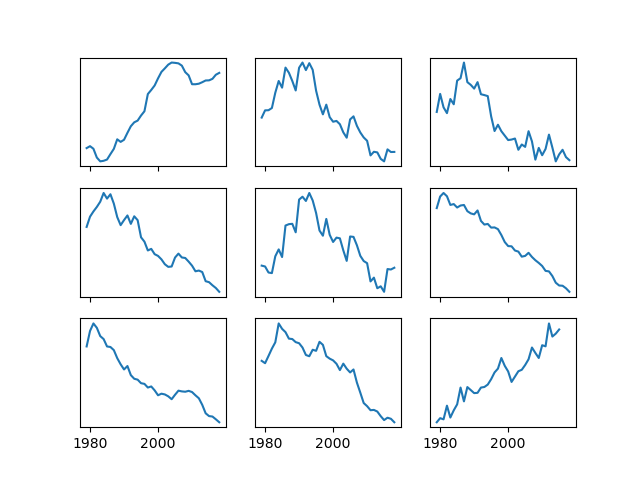

In [34]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True)

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
cols = ['population', 'violent_crime', 'homicide',
        'robbery', 'aggravated_assault','property_crime', 
        'burglary', 'motor_vehicle_theft', 'value']
for n in range(len(axs)):
    axs[n].plot(df["year"],df[cols[n]],"-")
    #axs[n].axes.get_xaxis().set_visible(False)
    axs[n].axes.get_yaxis().set_visible(False)
#     if "_" in cols[n]:
#         label = " ".join(cols[n].split("_"))
#     else:
#         label = cols[n]
#     axs[n].set_ylabel(label)
plt.set_title()

# Get National Level Data

52
Index(['State', 'City', 'Population', 'vc Total', 'vc Murder and Manslaughter',
       'vc Rape', 'vc Robbery', 'vc Aggravated Assault', 'pc Total',
       'pc Burglary', 'pc Larceny', 'pc Motor vehicle theft', 'Arson',
       'Avg Inequality'],
      dtype='object')


<IPython.core.display.Javascript object>


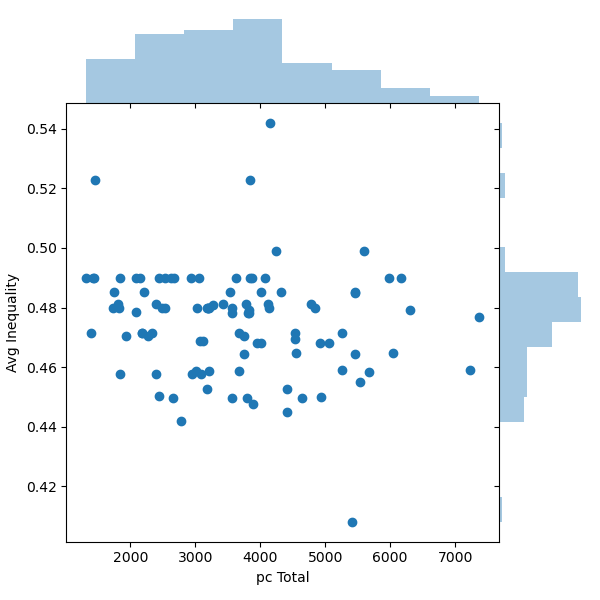

In [35]:
#https://crime-data-explorer.fr.cloud.gov/downloads-and-docs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

inequality = pd.read_csv("us inequality.txt",names = ["number","State","Gini"], sep ="\t", index_col=1)
crimes = pd.read_csv("us crime statistics.txt", sep ="\t",index_col=0, names=["State","City","Population","vc Total",
                                                       "vc Murder and Manslaughter", "vc Rape",'vc Robbery',
                                                       "vc Aggravated Assault","pc Total",'pc Burglary',
                                                       "pc Larceny","pc Motor vehicle theft","Arson"])

inequality.drop(columns="number", inplace=True)
crimes.reset_index(inplace=True)

#
def ineq(row):
    state = row["State"]
    x=0
    for character in state:
        if character.isdigit():
            state = state[:x]
            break
        x += 1

    row["Avg Inequality"] = inequality.loc[state, "Gini"]
    row["State"] = state
    return row

crimes = crimes.apply(ineq , axis=1)

sns.jointplot(crimes["pc Total"],crimes["Avg Inequality"], kind="scatter", space=0)
#sns.pairplot(crimes[['Population', 'vc Total', 'vc Robbery', 'vc Aggravated Assault', 'pc Total',
#                     'pc Burglary', 'pc Larceny', 'pc Motor vehicle theft', 'Avg Inequality']], diag_kind='kde');


